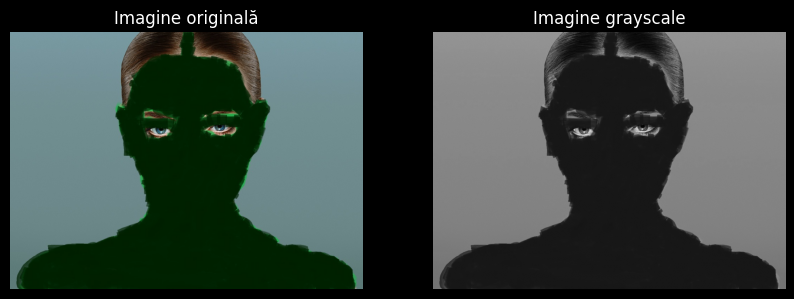

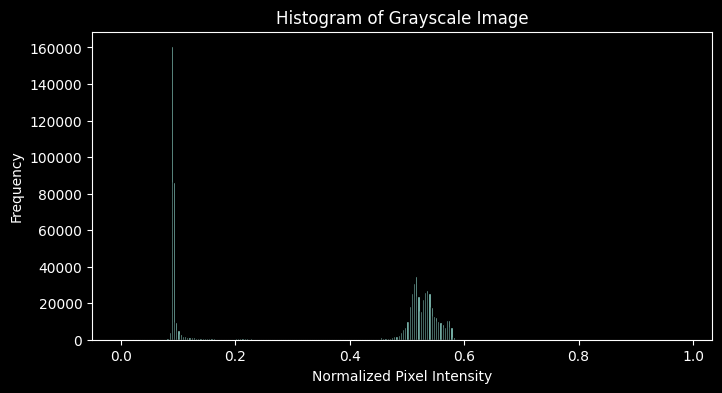

In [3]:
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt

plt.style.use('dark_background')

img = io.imread('1_colorat.jpg')

# Convert to grayscale. This already gives a float image in [0, 1].
gray_image = color.rgb2gray(img)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Imagine originală")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray', vmin=0, vmax=1)
plt.title("Imagine grayscale")
plt.axis("off")

plt.show()
hist, bin_edges = np.histogram(gray_image, bins=256)

plt.figure(figsize=(8, 4))
plt.bar(bin_edges[:-1], hist, width=(bin_edges[1] - bin_edges[0]), edgecolor='black')
plt.xlabel('Normalized Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Grayscale Image')
plt.show()


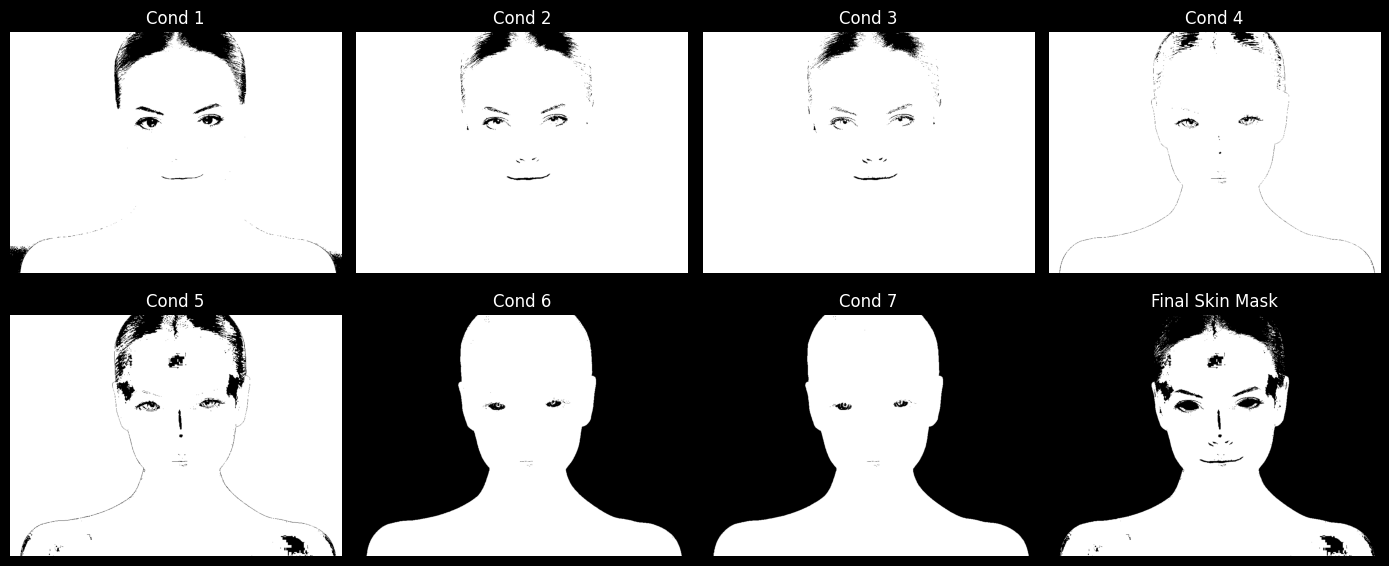

In [9]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

plt.style.use('dark_background')

img = io.imread('1.jpg')

# If needed, convert to float for safer arithmetic, but still in [0..255] range
img_float = img.astype(np.float32)

# Separate color channels for clarity
R = img_float[:, :, 0]
G = img_float[:, :, 1]
B = img_float[:, :, 2]

c1 = (R > 95)
c2 = (G > 40)
c3 = (B > 20)
c4 = ((np.max(img_float, axis=2) - np.min(img_float, axis=2)) > 15)
c5 = (np.abs(R - G) > 15)
c6 = (R > G)
c7 = (R > B)

# We now have 7 Boolean matrices: c1..c7
# The final skin mask is the AND of all conditions
skin_mask = c1 & c2 & c3 & c4 & c5 & c6 & c7
# mask_c1_c2 = np.logical_and(c1, c2)
# mask_c1_c2_c3 = np.logical_and(mask_c1_c2, c3)
# mask_c1_c2_c3_c4 = np.logical_and(mask_c1_c2_c3, c4)
# mask_c1_c2_c3_c4_c5 = np.logical_and(mask_c1_c2_c3_c4, c5)
# mask_c1_c2_c3_c4_c5_c6 = np.logical_and(mask_c1_c2_c3_c4_c5, c6)
# skin_mask = np.logical_and(mask_c1_c2_c3_c4_c5_c6, c7)

# --- Display each condition and the final mask ---
plt.figure(figsize=(14, 6))
conditions = [c1, c2, c3, c4, c5, c6, c7]
titles = [f"Cond {i+1}" for i in range(len(conditions))]

for i, (cond, title) in enumerate(zip(conditions, titles), start=1):
    plt.subplot(2, 4, i)
    plt.imshow(cond, cmap='gray')
    plt.title(title)
    plt.axis('off')

# Show the final combined mask
plt.subplot(2, 4, 8)
plt.imshow(skin_mask, cmap='gray')
plt.title("Final Skin Mask")
plt.axis('off')

plt.tight_layout()
plt.show()
